In [81]:
df = pd.read_csv("tips_dataset.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [83]:
#dropping duplicate values
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [85]:
# Scaling the "total_bill" column using MinMaxScaler :

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_dummies["total_bill"] =scaler.fit_transform(df_dummies[["total_bill"]])

# Regression Models

In [148]:
X_reg = df_dummies.drop(columns=["tip"])
y_reg = df_dummies["tip"]

#Split training and testing datasets, Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_reg,y_reg,test_size= 0.2, random_state=42)

### 1. Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

#Predictions 
y_pred_linear_reg = linear_regression.predict(X_test)

#Evaluate metrics
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test,y_pred_linear_reg)
print(f"R2 score for Linear Regression is {r2_linear_reg}")
print(f"MSE for Linear Regression is {mse_linear_reg}")

R2 score for Linear Regression is 0.43730181943482516
MSE for Linear Regression is 0.7033566017436103


### 2. Ridge Regression

In [154]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=10.0)
ridge_regression.fit(X_train,y_train)

#Predictions 
y_pred_ridge_reg = ridge_regression.predict(X_test)

#Evaluate metrics
r2_ridge_reg = r2_score(y_test, y_pred_ridge_reg)
mse_ridge_reg = mean_squared_error(y_test,y_pred_ridge_reg)
print(f"R2 score for Ridge Regression is {r2_ridge_reg}")
print(f"MSE for Ridge Regression is {mse_ridge_reg}")

R2 score for Ridge Regression is 0.2929005070300409
MSE for Ridge Regression is 0.8838541044693768


### 3. Lasso Regression

In [157]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.25)
lasso_regression.fit(X_train,y_train)

#Predictions 
y_pred_lasso_reg= lasso_regression.predict(X_test)

#Evaluate metrics
r2_lasso_reg = r2_score(y_test, y_pred_lasso_reg)
mse_lasso_reg = mean_squared_error(y_test,y_pred_lasso_reg)
print(f"R2 score for Lasso regression is {r2_lasso_reg}")
print(f"MSE for Lasso regression is {mse_lasso_reg}")

R2 score for Lasso regression is 0.10700975777748045
MSE for Lasso regression is 1.116212214386369


### 4. Decision Tree Regression

In [160]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train,y_train)

#Predictions 
y_pred_tree = tree.predict(X_test)

#Evaluate metrics
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test,y_pred_tree)
print(f"R2 score for Decision tree regressor is {r2_tree}")
print(f"MSE for Decision tree regressor is {mse_tree}")

R2 score for Decision tree regressor is -0.004178121600921791
MSE for Decision tree regressor is 1.2551938775510205


### 5. Random Forest

In [163]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train,y_train)

#Predictions
y_pred_forest = forest.predict(X_test)

#Evaluate metrics  
r2_forest = r2_score(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test,y_pred_forest)
print(f"R2 score for Random forest regressor is {r2_forest}")
print(f"MSE for Random forest regressor is {mse_forest}")

R2 score for Random forest regressor is 0.26393879853039115
MSE for Random forest regressor is 0.9200554102040827


### 6. Support Vector Regression

In [166]:
from sklearn.svm import SVR
svr = SVR(kernel = "linear")
svr.fit(X_train,y_train)

#Predictions    
y_pred_svr = svr.predict(X_test)

#Evaluate metrics
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test,y_pred_svr)
print(f"R2 score for Support vector regressor is {r2_svr}")
print(f"MSE for Support vector regressor is {mse_svr}")

R2 score for Support vector regressor is 0.43025919700141146
MSE for Support vector regressor is 0.7121596779809528


### 7. K-Nearest Neighbours

In [169]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

#Predictions
y_pred_knn = knn.predict(X_test)

#Evaluate metrics
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test,y_pred_knn)
print(f"R2 score for KNN regressor is {r2_knn}")
print(f"MSE for KNN regressor is {mse_knn}")

R2 score for KNN regressor is 0.07950229462986103
MSE for KNN regressor is 1.150595755102041


Best model is the one with highest R^2 and lowest MSE, so in this case, it is Linear regression


### Most Important Feature

In [173]:
# Now we have to ckeck which feature affects the tip amount the most
features_coeff_abs = (pd.Series(linear_regression.coef_, index = X_reg.columns)).abs().sort_values(ascending = False)

print(features_coeff_abs)


total_bill    4.520965
size          0.233484
smoker_Yes    0.192353
day_Sat       0.185785
day_Thur      0.179721
time_Lunch    0.094957
day_Sun       0.050793
sex_Male      0.028819
dtype: float64


The magnitudes of the coefficients for each feature in the trained Linear Regression Model is given above. A higher magnitude indicates a greater impact on the tip amount. Hence, total_bill is the feature with most impact 

# Plots

### Pairplot

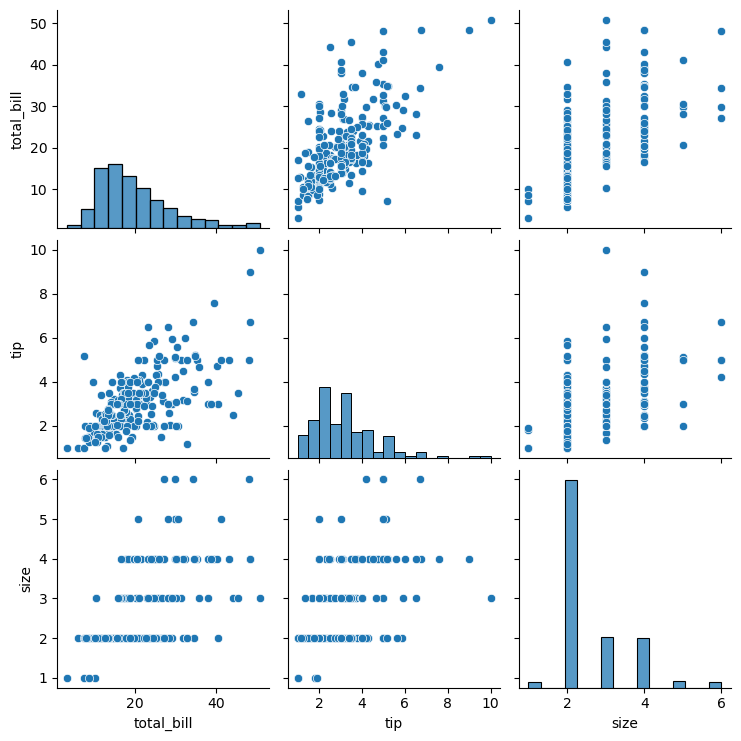

In [178]:
sns.pairplot(df)
plt.show()

### Scatterplots and Lineplots

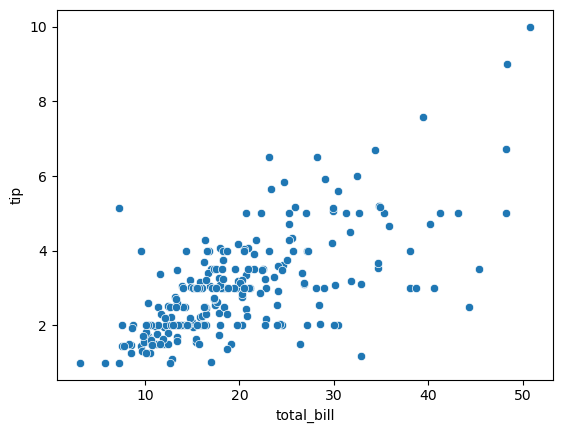

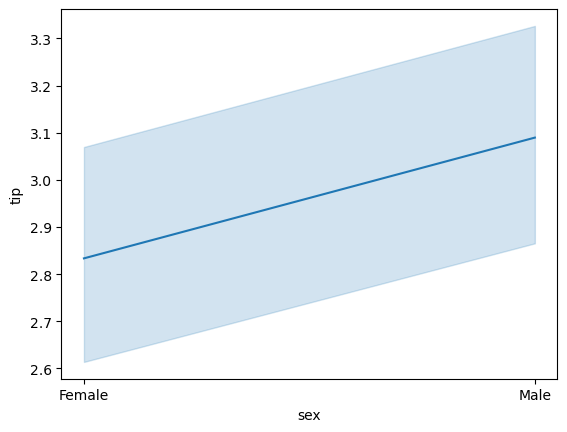

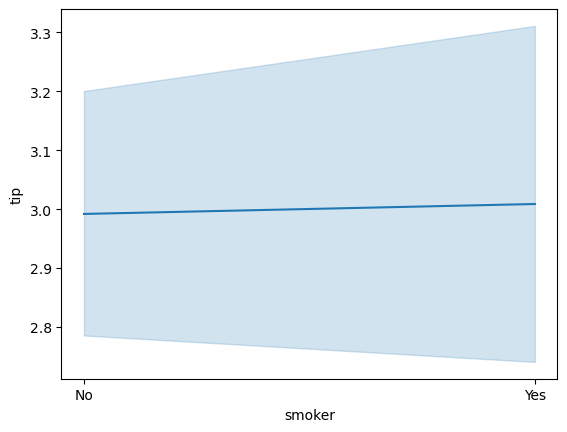

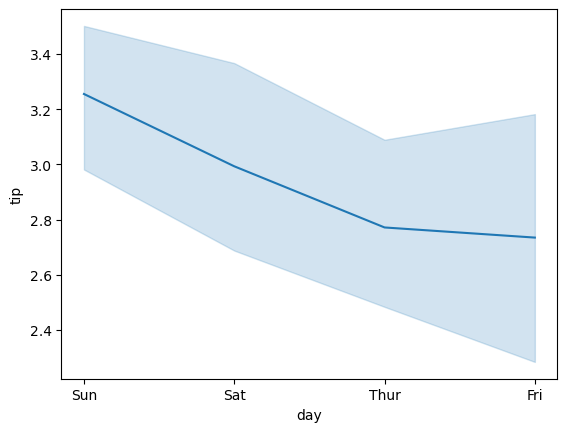

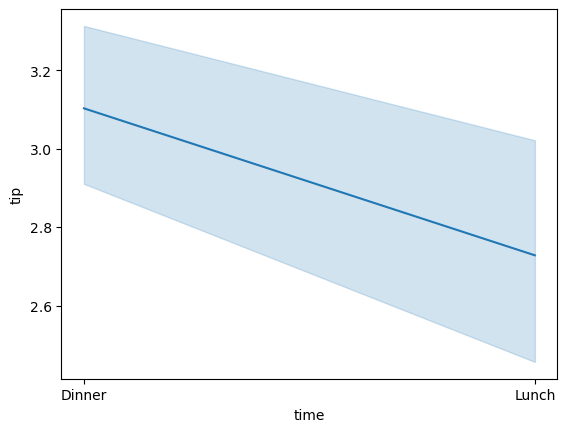

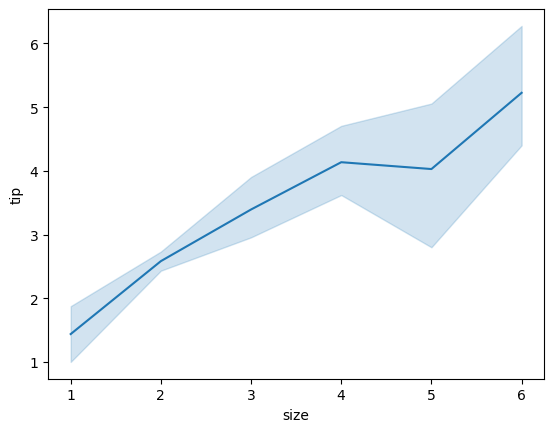

In [181]:
# The only numeric feature is total_bill. So we will use it for Scatter Plot and Line Plot
# Rest features will be depicted with line plots, each point is mean of the value of "tip" for that particular class.

sns.scatterplot(x = 'total_bill', y = 'tip', data = df)
plt.show()

for i in df.columns : 
    if i != 'total_bill' and i != 'tip':
        sns.lineplot(x=i,y="tip",data=df,estimator="mean")
        plt.show()

### Plotting Residuals

We will plot the error (y_pred - y_test) for each value of y_test.

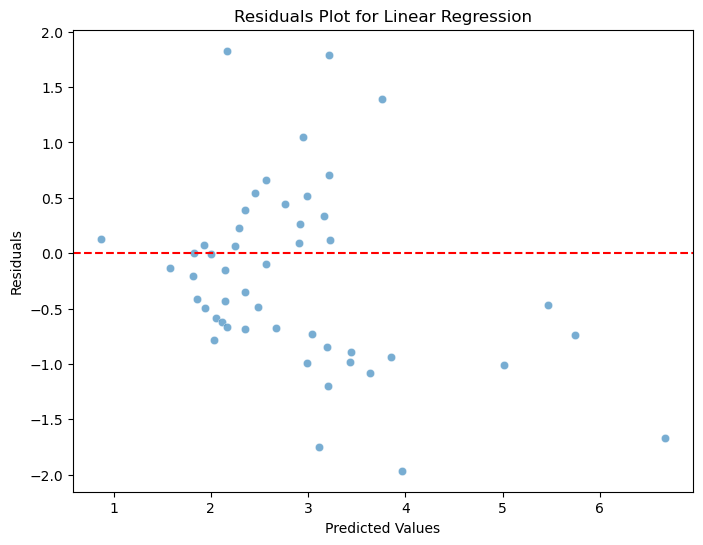

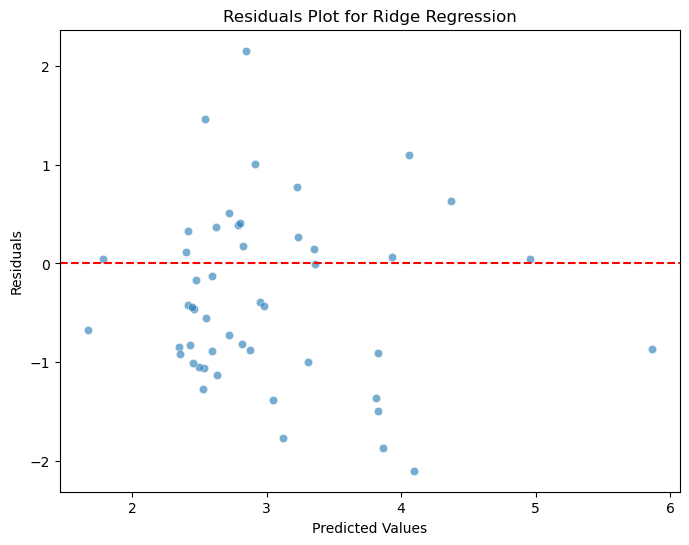

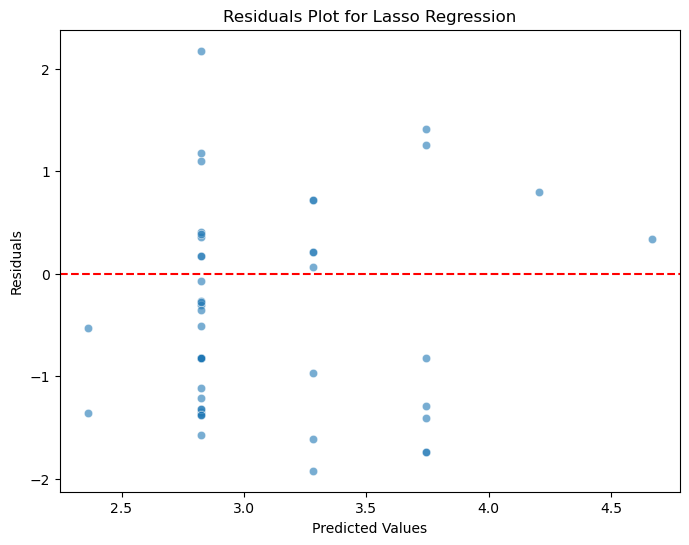

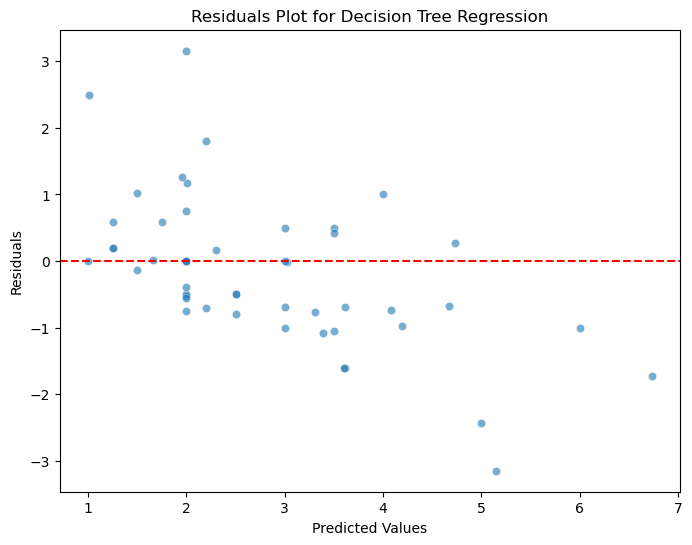

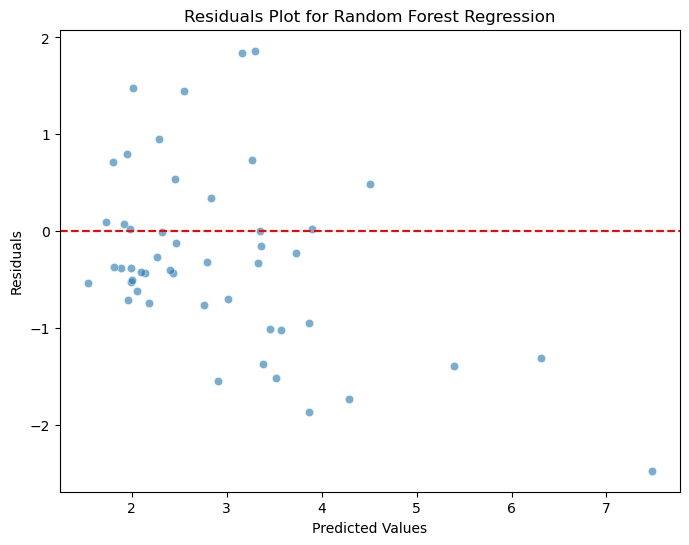

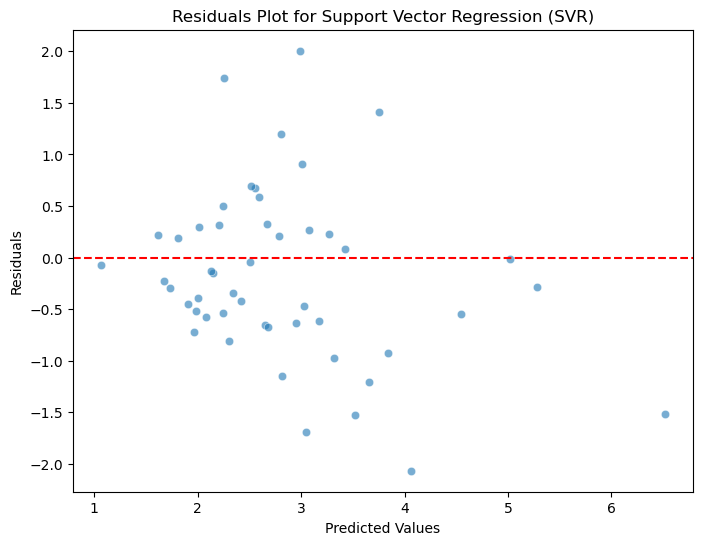

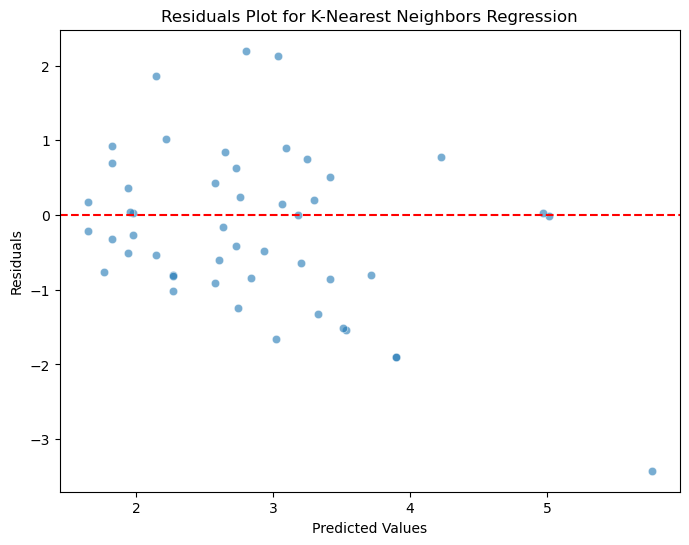

In [185]:
# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr = linear_regression.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge_regression.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso_regression.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

### Correlation Matrix with Heatmap

<Axes: >

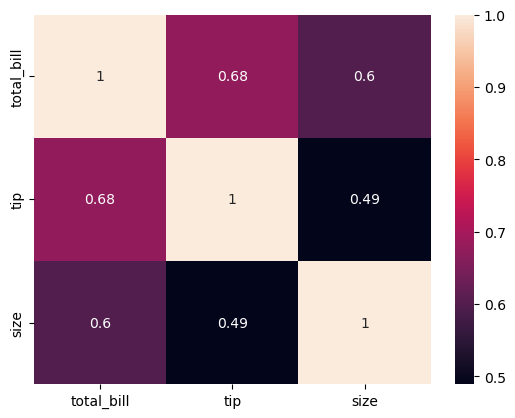

In [198]:
df_correlation = df[["total_bill","tip","size"]].corr()
sns.heatmap(df_correlation, annot=True)

## The Rainbow test helps determine if a linear model is suitable, even when some underlying relationships may not be linear.

In [215]:
#Label encoding categorical variables to numerical values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded['sex'] = label_encoder.fit_transform(df['sex'])
df_encoded['smoker'] = label_encoder.fit_transform(df['smoker'])
df_encoded['day'] = label_encoder.fit_transform(df['day'])
df_encoded['time'] = label_encoder.fit_transform(df['time'])

In [217]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# We will have to train a Linear Regression model using statsmodels.OLS , as it is not directly compatible with sckikit learn

X = df_encoded.drop(columns = ['tip'])
y = df_encoded['tip']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2192606967586392
P-value: 0.14110495805391088


- The null hypothesis is that the regression is correctly modelled as linear.
- The alternative hypothesis is that the regression is not correctly modelled as linear.
- If the p-value is less than some threshold (e.g. 0.05), then the null hypothesis is rejected and the alternative hypothesis is accepted.
- If the p-value is greater than some threshold (e.g. 0.05), then the null hypothesis is accepted and the alternative hypothesis is rejected.
- Here, we see that the p-value is higher than 0.05, so we accept the null hypothesis and reject the alternative hypothesis. This means that the regression is correctly modelled as linear.

## Conclusion

- Total bill amount significantly impacts tip amount.
- People tip more during dinner.
- Tip amount is proportional to group size.
- Males tend to give more tips.
- More tips are received on Sundays.
- Prioritize service for larger groups.
- Focus on dinner service for higher tips.
- Linear Regression Model had the best performance with the highest R² score and lowest MSE.